<a href="https://colab.research.google.com/github/pratikbariya/Digit-Recognition-Using-DNN/blob/main/DigitRecognitionUsingDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# load dataset from sklearn.datasets

from sklearn.datasets import load_digits
digits=load_digits()

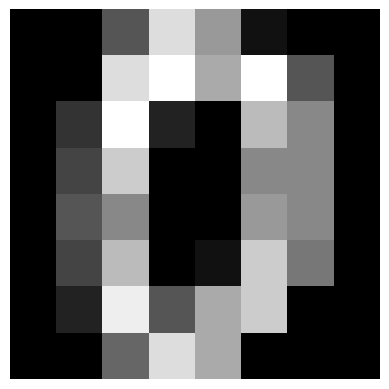

In [3]:
#  Let's see how first image of the data look like.

plt.imshow(digits.images[0], cmap='gray')
plt.axis('off')
plt.show()

In [4]:
# let's check how image array look like:

digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
# the target digit of the image:

digits.target[0]

# here every image has 64 bits.

np.int64(0)

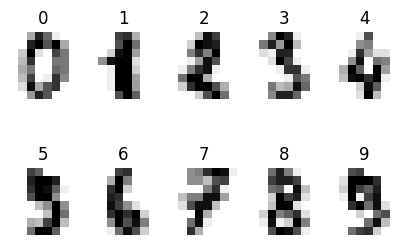

In [6]:
# the image and label representation:

images_and_labels=list(zip(digits.images,digits.target))
plt.figure(figsize=(5,5))
for index,(image,label) in enumerate(images_and_labels[:10]):
    plt.subplot(3,5,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('%i' % label)

In [7]:
# determine variables like total samples, image and target:

n_samples=len(digits.images)
print("Number of samples in the data set is :"+ str(n_samples))

x=digits.images.reshape((n_samples,-1))
print("Shape of input matrix x is : "+str(x.shape))

y=digits.target
print("Shape of target vector y is :"+str(y.shape))

Number of samples in the data set is :1797
Shape of input matrix x is : (1797, 64)
Shape of target vector y is :(1797,)


In [8]:
# split data into training and testing.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
      x, y, test_size=0.2, random_state=0
    )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


In [9]:
# feature scaling:

# These learned parameters are then used to scale our test data. The fit method is
# calculating the mean and variance of each of the features present in our data.
# The transform method is transforming all the features using the respective mean
# and variance.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
print(y_train.shape)


(1437, 64)
(1437,)


In [10]:
# convert each training example to column vector.

X_train=X_train.T # (1437, 64) --> (64, 1437) : (samples, features) --> (features, samples)
X_test=X_test.T # (1437,) --> (1, 1437)
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
y_train=y_train.T
y_test=y_test.T

print(X_train.shape)
print(y_train.shape)

(64, 1437)
(1, 1437)


In [11]:
# change y_train and y_test data to 10 possible outputs.

Y_train_=np.zeros((10,y_train.shape[1]))
for i in range(y_train.shape[1]):
    Y_train_[y_train[0,i],i]=1
print(Y_train_.shape)

Y_test_=np.zeros((10,y_test.shape[1]))
for i in range(y_test.shape[1]):
    Y_test_[y_test[0,i],i]=1
print(Y_test_.shape)

# here we have done with data processing.

(10, 1437)
(10, 360)


In [12]:
# Initialize weights and biases for deep neural networks.
# Here layer_dims is [n_x, n_h1, n_h2, ..., n_y] represents list of the number of units.
# [64, 60, 10, 10] this means:
# Input layer: 64 units
# Hidden layer 1: 60 units
# Hidden layer 2: 10 units
# Output layes: 10 units

def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    return parameters
    # return parameters --> {'W1': ..., 'b1': ..., 'W2': ..., 'b2': ..., ... }

In [13]:
# linear forward propogation

def linear_forward(A, W, b):
    Z = np.dot(W,A)+b # WA + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

In [14]:
# use ful activation functions and their derivatives
def sigmoid_(Z):
    return 1/(1+np.exp(-Z))

def relu_(Z):
    return Z*(Z>0)

def drelu_(Z):
    return 1. *(Z>0)

def dsigmoid_(Z):
    return sigmoid_(Z)*(1-sigmoid_(Z))

def sigmoid(Z):
    return sigmoid_(Z),Z

def relu(Z):
    return relu_(Z),Z

In [15]:
# linear action forward

def linear_activation_forward(A_prev,W,b,activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [16]:
# implementation of forward propogation for L layer neural network
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev,parameters['W'+str(l)],parameters['b'+str(l)],"relu")
        caches.append(cache)

    AL, cache = linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+str(L)],"sigmoid")
    caches.append(cache)
    return AL, caches

In [17]:
# cost function(cross-entropy)

def compute_cost(AL, Y):
    m=Y.shape[1]
    cost = -(1/m)*np.sum((Y*np.log(AL)+(1-Y)*np.log(1-AL)))
    cost=np.squeeze(cost)
    assert(cost.shape == ())
    return cost

In [18]:
# linear backward for specific layer

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

In [19]:
def relu_backward(dA,activation_cache):
    return dA* drelu_(activation_cache)

def sigmoid_backward(dA,activation_cache):
    return dA* dsigmoid_(activation_cache)

In [20]:
# linear backward function

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    return dA_prev,dW,db



In [21]:
# back propogation for L layers
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    #Y = Y.reshape(AL.shape)

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,"sigmoid")

    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)],current_cache,"relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

In [22]:
#update parameters
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-(learning_rate)*grads["dW"+str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-(learning_rate)*grads["db"+str(l+1)]
    return parameters

Cost after iteration 0: 6.931433
Cost after iteration 1000: 3.774829
Cost after iteration 2000: 3.262610
Cost after iteration 3000: 3.249175
Cost after iteration 4000: 3.248149
Cost after iteration 5000: 3.245551
Cost after iteration 6000: 3.234484
Cost after iteration 7000: 3.108940
Cost after iteration 8000: 2.714129
Cost after iteration 9000: 2.217460
Cost after iteration 10000: 1.924373
Cost after iteration 11000: 1.561357
Cost after iteration 12000: 1.231272
Cost after iteration 13000: 0.951040
Cost after iteration 14000: 0.764662
Cost after iteration 15000: 0.618042
Cost after iteration 16000: 0.489283
Cost after iteration 17000: 0.401840
Cost after iteration 18000: 0.339931
Cost after iteration 19000: 0.289097
Cost after iteration 20000: 0.243822
Cost after iteration 21000: 0.203796
Cost after iteration 22000: 0.171250
Cost after iteration 23000: 0.145861
Cost after iteration 24000: 0.126011
Cost after iteration 25000: 0.109966
Cost after iteration 26000: 0.096728
Cost after ite

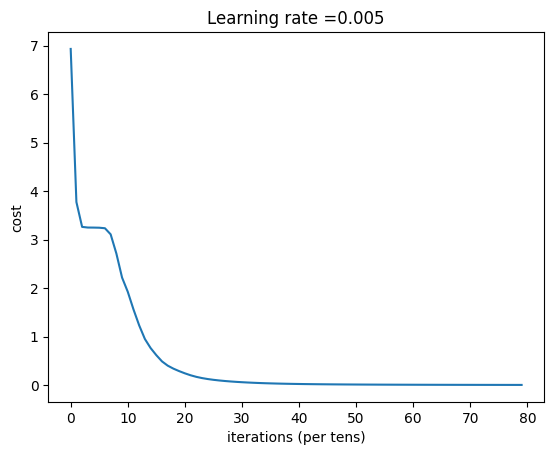

In [23]:
# N layer neural network

n_x=X_train.shape[0]
layers_dims=[n_x, 60,10,10]

def L_layer_model(X, Y, layers_dims, learning_rate = 0.005, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []

    parameters = initialize_parameters_deep(layers_dims)

    for i in range(0, num_iterations):
        # here we are training model to forward, then measure the cost.
        # after train backward and update the parameter for next same following cycle.

        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)


    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters


# training, predecting and visulization
parameters = L_layer_model(
    X_train, Y_train_, layers_dims, num_iterations = 80000, print_cost = True
)

In [24]:
def predict_L_layer(X,parameters):
    AL,caches=L_model_forward(X,parameters)
    prediction=np.argmax(AL,axis=0)
    return prediction.reshape(1,prediction.shape[0])

In [25]:
predictions_train_L = predict_L_layer(X_train, parameters)
print("Training Accuracy : "+ str(np.sum(predictions_train_L==y_train)/y_train.shape[1] * 100)+" %")

Training Accuracy : 100.0 %


In [26]:
predictions_test_L=predict_L_layer(X_test,parameters)
print("Testing Accuracy : "+ str(np.sum(predictions_test_L==y_test)/y_test.shape[1] * 100)+" %")

Testing Accuracy : 97.5 %


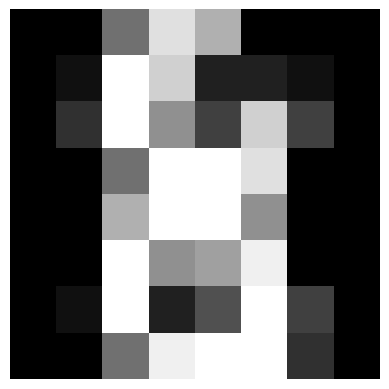

Predicted digit is : [[8]]
True digit is: 8


In [32]:
import random

# pick random number between 0-9 and show predicted digit and actual digit.
i=random.randint(0,n_samples)
plt.imshow(digits.images[i], cmap='gray')
plt.axis('off')
plt.show()
img=digits.images[i].reshape((64,1)).T
img = sc.transform(img)
img=img.T
predicted_digit=predict_L_layer(img,parameters)
print('Predicted digit is : '+str(predicted_digit))
print('True digit is: '+ str(y[i]))